## Google drive mount
---

In [1]:
# google drive에 있는 데이터를 사용하기 위해 접근

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lib Import
---

In [2]:
#Import lib
import pandas as pd, numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from math import *

## 데이터 전처리
---

In [3]:
# 지역데이터 불러오기
sgg = pd.read_csv("/content/drive/MyDrive/OPH_Project_Data/서울시행정동별통합데이터.csv")


# 자치구 열을 기준으로 그룹화하여 각 열의 합계 및 평균 구하기
sgg_grouped = sgg.groupby('자치구').agg({
    '인구전입량': 'sum',
    '청년1인가구인구수': 'sum',
    '응급실수': 'sum',
    '대형마트수': 'sum',
    '주요공원수': 'sum',
    '지하철역수': 'sum',
    '아파트월세보증금': 'mean',
    '아파트월세': 'mean',
    '다세대주택월세보증금': 'mean',
    '다세대주택월세': 'mean',
    '오피스텔월세보증금': 'mean',
    '오피스텔월세': 'mean',
    '아파트매매가': 'mean',
    '오피스텔매매가': 'mean',
    '다세대주택매매가': 'mean',
    '아파트전세': 'mean',
    '다세대주택전세': 'mean',
    '오피스텔전세': 'mean'
}).reset_index()

# 결과 출력
display(sgg_grouped)

sgg_grouped.to_csv('서울시자치구별통합데이터.csv', index=False)

,자치구,인구전입량,청년1인가구인구수,응급실수,대형마트수,주요공원수,지하철역수,아파트월세보증금,아파트월세,다세대주택월세보증금,다세대주택월세,오피스텔월세보증금,오피스텔월세,아파트매매가,오피스텔매매가,다세대주택매매가,아파트전세,다세대주택전세,오피스텔전세
0,강남구,14809.250000,11189.0,3,33,7,44,30862.177886,175.752354,13321.055296,83.564106,6104.762359,135.416850,157171.327700,45289.284857,80667.499841,77052.898352,20551.116124,12359.554700
1,강동구,10662.000000,8783.0,3,20,7,14,18488.414452,73.302490,8461.375304,49.987360,2005.595238,59.977891,70986.805384,20914.211930,32469.294200,44072.033893,17853.393252,6306.270662
2,강북구,4992.000000,3096.0,3,15,3,11,8158.599093,78.746875,7511.504492,43.998529,1653.968254,70.043651,42944.587440,14183.237100,20266.728328,28411.053873,12431.289075,1866.666667
3,강서구,17902.500000,12499.0,6,35,11,28,15963.378506,97.379471,5449.611280,66.738946,3658.627952,54.975287,69576.724978,18994.031466,25662.169544,37544.046310,13787.400358,9662.355657
4,관악구,12937.500000,3709.0,4,16,2,9,13788.666411,65.800180,10005.719666,50.050748,4195.946589,48.945809,53328.457577,17296.736537,28530.838700,38306.519707,15702.134730,6482.485775
5,광진구,16624.000000,8415.0,2,26,2,11,15277.759486,103.892297,9149.820813,61.792925,4443.429038,70.435574,64469.054824,21589.085910,33238.730841,52257.391152,20474.857165,18550.583979
6,구로구,13500.000000,6191.0,2,27,3,14,15052.438700,71.364319,4646.669111,40.225776,4243.455064,52.889018,48643.660146,24911.686507,27313.036863,34994.485625,11078.679240,10150.537195
7,금천구,22824.000000,9762.0,1,42,7,4,14489.733804,57.642118,7583.804133,52.023760,4479.384164,51.145777,43341.211482,26638.283438,23737.793068,34376.281420,13503.080264,11342.765696
8,노원구,8125.000000,8350.0,3,17,3,24,7688.636590,58.234676,5252.384524,41.424107,812.500000,58.583333,44478.545250,14149.283327,22996.279495,29555.533823,17115.684594,12022.916665
9,도봉구,4925.000000,3624.0,1,15,6,8,6572.193883,82.633377,5361.167184,45.684265,2046.776316,58.758333,39017.552260,19131.388935,18962.338585,26721.319190,13067.007967,7422.222353


In [4]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

## 오피스텔 부동산 가격
---

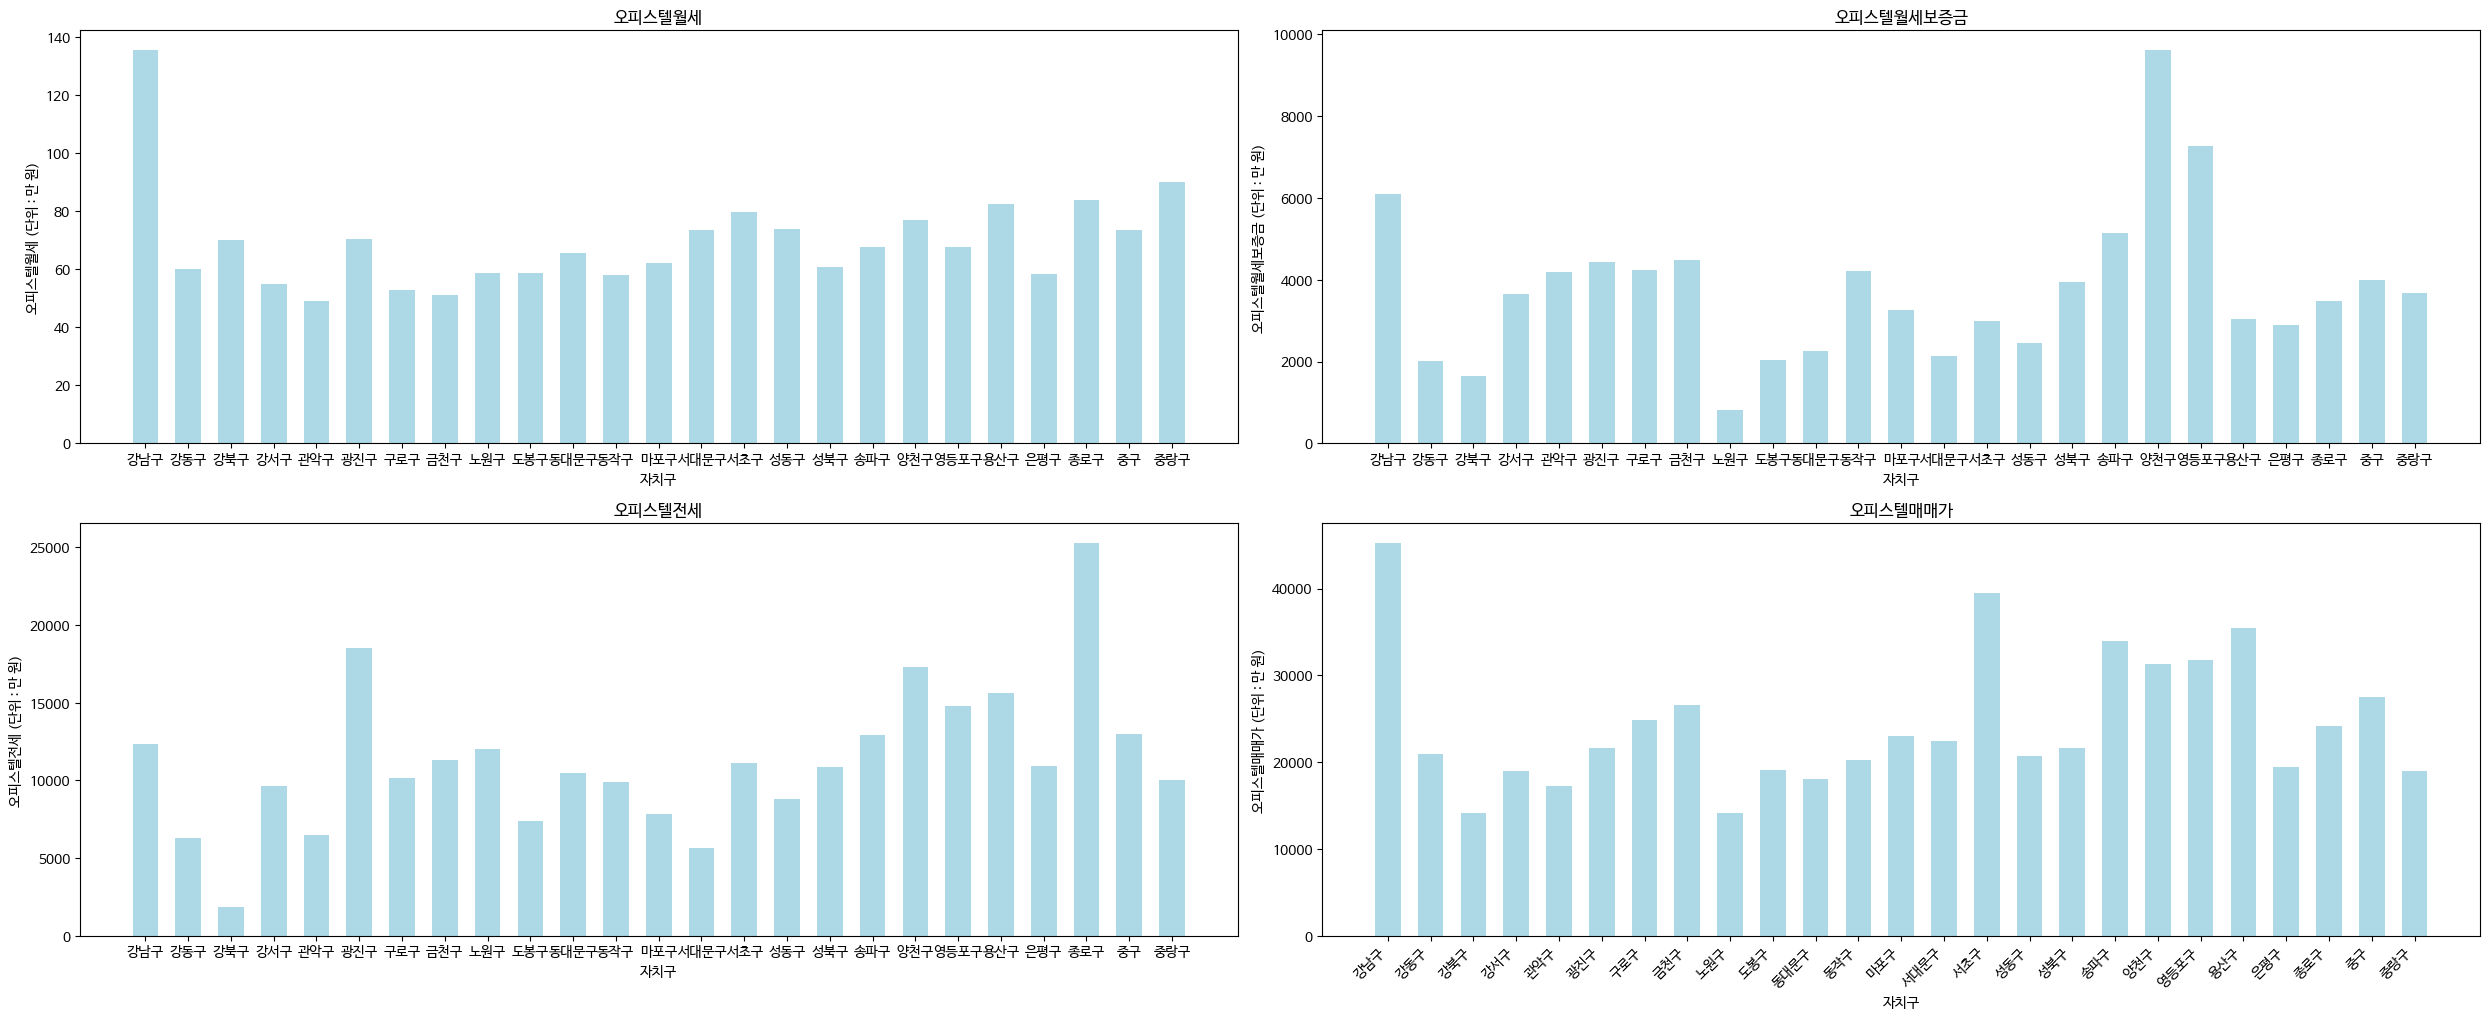

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

# 그래프 설정
plt.figure(figsize=(25, 10))

# 오피스텔월세 분포 (막대 그래프)
plt.subplot(2, 2, 1)
plt.bar(sgg_grouped['자치구'], sgg_grouped['오피스텔월세'], width=0.6, color='lightblue')
plt.title('오피스텔월세')
plt.xlabel('자치구')
plt.ylabel('오피스텔월세 (단위 : 만 원)')

# 오피스텔월세보증금 분포 (막대 그래프)
plt.subplot(2, 2, 2)
plt.bar(sgg_grouped['자치구'], sgg_grouped['오피스텔월세보증금'], width=0.6, color='lightblue')
plt.title('오피스텔월세보증금')
plt.xlabel('자치구')
plt.ylabel('오피스텔월세보증금 (단위 : 만 원)')

# 오피스텔전세 분포 (막대 그래프)
plt.subplot(2, 2, 3)
plt.bar(sgg_grouped['자치구'], sgg_grouped['오피스텔전세'], width=0.6, color='lightblue')
plt.title('오피스텔전세')
plt.xlabel('자치구')
plt.ylabel('오피스텔전세 (단위 : 만 원)')

# 오피스텔매매가 분포 (막대 그래프)
plt.subplot(2, 2, 4)
plt.bar(sgg_grouped['자치구'], sgg_grouped['오피스텔매매가'], width=0.6, color='lightblue')
plt.title('오피스텔매매가')
plt.xlabel('자치구')
plt.ylabel('오피스텔매매가 (단위 : 만 원)')

# 그래프 출력
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

## 전체 자치구 데이터 불러오기
---

In [7]:
# google drive에 있는 데이터를 사용하기 위해 접근

from google.colab import drive
drive.mount('/content/drive')


# 전체 자치구 데이터 불러오기
dong_grouped = pd.read_csv("/content/drive/MyDrive/OPH_Project_Data/서울시자치구별통합데이터.csv")
display(dong_grouped)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,자치구,인구전입량,청년1인가구인구수,응급실수,대형마트수,주요공원수,지하철역수,아파트월세보증금,아파트월세,다세대주택월세보증금,다세대주택월세,오피스텔월세보증금,오피스텔월세,아파트매매가,오피스텔매매가,다세대주택매매가,아파트전세,다세대주택전세,오피스텔전세
0,강남구,14809.250000,11189.0,3,33,7,44,30862.177886,175.752354,13321.055296,83.564106,6104.762359,135.416850,157171.327700,45289.284858,80667.499841,77052.898352,20551.116124,12359.554700
1,강동구,10662.000000,8783.0,3,20,7,14,18488.414452,73.302490,8461.375304,49.987360,2005.595238,59.977891,70986.805384,20914.211930,32469.294200,44072.033893,17853.393252,6306.270662
2,강북구,4992.000000,3096.0,3,15,3,11,8158.599093,78.746875,7511.504492,43.998529,1653.968254,70.043651,42944.587440,14183.237100,20266.728328,28411.053873,12431.289075,1866.666667
3,강서구,17902.500000,12499.0,6,35,11,28,15963.378506,97.379471,5449.611280,66.738946,3658.627952,54.975287,69576.724978,18994.031466,25662.169544,37544.046310,13787.400358,9662.355657
4,관악구,12937.500000,3709.0,4,16,2,9,13788.666411,65.800180,10005.719666,50.050748,4195.946589,48.945809,53328.457577,17296.736537,28530.838700,38306.519707,15702.134730,6482.485775
5,광진구,16624.000000,8415.0,2,26,2,11,15277.759486,103.892297,9149.820813,61.792925,4443.429038,70.435574,64469.054824,21589.085910,33238.730841,52257.391152,20474.857165,18550.583979
6,구로구,13500.000000,6191.0,2,27,3,14,15052.438700,71.364319,4646.669111,40.225776,4243.455064,52.889018,48643.660146,24911.686507,27313.036863,34994.485625,11078.679240,10150.537195
7,금천구,22824.000000,9762.0,1,42,7,4,14489.733804,57.642118,7583.804133,52.023760,4479.384164,51.145777,43341.211482,26638.283438,23737.793068,34376.281420,13503.080264,11342.765696
8,노원구,8125.000000,8350.0,3,17,3,24,7688.636590,58.234676,5252.384524,41.424107,812.500000,58.583333,44478.545250,14149.283327,22996.279495,29555.533823,17115.684594,12022.916665
9,도봉구,4925.000000,3624.0,1,15,6,8,6572.193883,82.633377,5361.167184,45.684265,2046.776316,58.758333,39017.552260,19131.388935,18962.338585,26721.319190,13067.007967,7422.222353


## 자치구별 오피스텔 부동산 가격 표준편차 & 평균 계산
---

In [9]:
import pandas as pd
from scipy.stats import zscore

# 오피스텔 가격 데이터만 추출하여 새로운 데이터프레임 생성
df_studio_price = dong_grouped.copy()
df_std_devs = df_studio_price[['오피스텔매매가', '오피스텔전세', '오피스텔월세보증금', '오피스텔월세']].copy()


 # 전체 자치구에 대한 오피스텔 매매가, 오피스텔 전세가, 오피스텔 월세의 표준편차를 계산
std_devs_trade = np.std(df_studio_price['오피스텔매매가'])
std_devs_lease = np.std(df_studio_price['오피스텔전세'])
std_devs_rentdeposit = np.std(df_studio_price['오피스텔월세보증금'])
std_devs_rent = np.std(df_studio_price['오피스텔월세'])


# std_devs 들을 pd로 변환해야 됨
std_devs_trade = pd.Series(np.std(df_studio_price['오피스텔매매가']), name='오피스텔매매가')
std_devs_lease = pd.Series(np.std(df_studio_price['오피스텔전세']), name='오피스텔전세')
std_devs_rentdeposit = pd.Series(np.std(df_studio_price['오피스텔월세보증금']), name='오피스텔월세보증금')
std_devs_rent = pd.Series(np.std(df_studio_price['오피스텔월세']), name='오피스텔월세')


# 결과를 하나의 DataFrame으로 통합
std_result_studio = pd.concat([std_devs_trade, std_devs_lease, std_devs_rentdeposit, std_devs_rent], axis=1)

# 결과 출력
display(std_result_studio)

# 아파트 가격 데이터 평균 계산
df_studio_selected = dong_grouped.copy()[['오피스텔매매가', '오피스텔전세', '오피스텔월세보증금', '오피스텔월세']]
studio_means = df_studio_selected.mean()

# 계산한 평균을 데이터프레임으로 변환
df_studio_means = pd.DataFrame(studio_means).transpose()

# 결과확인
display(df_studio_means)

,오피스텔매매가,오피스텔전세,오피스텔월세보증금,오피스텔월세
0,7672.590534,4621.407782,1828.42063,17.115233


,오피스텔매매가,오피스텔전세,오피스텔월세보증금,오피스텔월세
0,24454.937983,11231.840337,3760.018803,69.376583


## 자치구별 오피스텔 부동산 가격 z-score로 계산
---

In [10]:
# 자치구별 아파트 가격 데이터 표준점수 (Z-score) 계산
df_studio_z_scores_no_sgg = (dong_grouped[['오피스텔매매가', '오피스텔전세', '오피스텔월세보증금', '오피스텔월세']].copy() - df_studio_means.values) / std_result_studio.values

# 결과 출력
(df_studio_z_scores_no_sgg)

# '자치구' 컬럼 선택
df_sgg = dong_grouped[['자치구']]

# '자치구' 컬럼과 표준점수 데이터프레임 연결
df_studio_z_scores = pd.concat([df_sgg, df_studio_z_scores_no_sgg], axis=1)

# 결과 출력
display(df_studio_z_scores)

,자치구,오피스텔매매가,오피스텔전세,오피스텔월세보증금,오피스텔월세
0,강남구,2.715425,0.244020,1.282387,3.858567
1,강동구,-0.461477,-1.065816,-0.959530,-0.549142
2,강북구,-1.338753,-2.026476,-1.151841,0.038975
3,강서구,-0.711742,-0.339612,-0.055453,-0.841431
4,관악구,-0.932958,-1.027686,0.238418,-1.193719
5,광진구,-0.373518,1.583661,0.373771,0.061874
6,구로구,0.059530,-0.233977,0.264401,-0.963327
7,금천구,0.284564,0.024003,0.393435,-1.065180
8,노원구,-1.343178,0.171176,-1.612057,-0.630622
9,도봉구,-0.693840,-0.824341,-0.937007,-0.620398


## 표준점수를 백분위 점수로 변환
---

In [12]:
# import lib
from scipy.stats import norm

# Z-Score를 Percentile Rank로 변환
df_percentiles_studio = df_studio_z_scores_no_sgg.apply(lambda x: norm.cdf(x) * 100)

# 소수점 한 자리까지 반올림
df_percentiles_studio = df_percentiles_studio.round(1)

# '%' 기호 추가
df_percentiles_studio = df_percentiles_studio.astype(str) + '%'

# '자치구' 컬럼과 표준점수 데이터프레임 연결
df_studio_z_scores = pd.concat([df_sgg, df_percentiles_studio], axis=1)

# 결과 출력
display(df_studio_z_scores)

# csv 파일 변환
df_studio_z_scores.to_csv('서울시_자치구별_오피스텔가격_종합_백분위.csv', index=False)


,자치구,오피스텔매매가,오피스텔전세,오피스텔월세보증금,오피스텔월세
0,강남구,99.7%,59.6%,90.0%,100.0%
1,강동구,32.2%,14.3%,16.9%,29.1%
2,강북구,9.0%,2.1%,12.5%,51.6%
3,강서구,23.8%,36.7%,47.8%,20.0%
4,관악구,17.5%,15.2%,59.4%,11.6%
5,광진구,35.4%,94.3%,64.6%,52.5%
6,구로구,52.4%,40.8%,60.4%,16.8%
7,금천구,61.2%,51.0%,65.3%,14.3%
8,노원구,9.0%,56.8%,5.3%,26.4%
9,도봉구,24.4%,20.5%,17.4%,26.7%
